In [90]:
'''
Introduction.
The objective of this project is to create machine learning model for prediction of serious drug adverse reaction
that will result in fatality of a drug or product user. This is the most serious type of drug adverse event as it is an
irreparable loss.The sample data used for this predictive modelling was obtained from the United States of America
federal drug agency database. The database contains reports of drug adverse events which occured in various countries of
the world. A total of 92130 drug adverse reports were extracted from the database with selected 52 attributes of the
each reported events.

A risk evaluation and mitigation model is created using the drug adverse reaction reports.
The target variable for classification is 'seriousness death'

The main insights gained from this project are. 
1. What are the most important features of samples which had fatal drug adverse effect?
2. Which Predictive model gives the best performance in prediction of fatal drug adverse reaction on those who will
use the drugs?


The project.
The model pipeline was developed using the following stages of model development
1. Data Import, Quality control and Dat
2. Descriptive statistics
3. Exploratory data analysis and visualisation
4. Feature engineering and extraction
5. Data selection and scaling
6. Predictive model building and evaluation
7. Model hyper parameter tuning
8. Final model and evaluation
9. Model deployment
10.Project summary and report

Result.
The three best models created are a, b and c. The performace evaluation obatained are ...,
... and ...

The most important predictive features are ...,..., and based on rank of importance

'''
a ='a'

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import xlrd
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import re, string, unicodedata
import os
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import Word2Vec
import spacy
import math
import nbconvert
%matplotlib inline
import glob
#import gensim
import nltk
import inflection as inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from string import ascii_lowercase
import itertools, snowballstemmer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import Word2Vec
import spacy
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from pyspark.sql.session import SparkSession
# instantiate Spark
spark = SparkSession.builder.getOrCreate()

In [154]:
# Read the input csv data format
drug_reaction_inputdf = pd.read_csv("C:/Users/yasser/Desktop/Godly_appl/AstraZeneca/drug_adverse_report_data.csv",na_values=' ')

In [155]:
# check the number of rows and columns and account for total input data imported

drug_reaction_inputdf.shape

(92130, 52)

In [156]:
# Quality control for data type and the number of non null values in each column

drug_reaction_inputdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92130 entries, 0 to 92129
Data columns (total 52 columns):
Unnamed: 0                           92130 non-null int64
Companynumb                          91822 non-null object
drug Index (generated)               92130 non-null int64
Drugadministrationroute              27530 non-null float64
Drugauthorizationnumb                10887 non-null float64
Drugbatchnumb                        4322 non-null object
Drugcharacterization                 92130 non-null int64
Drugdosagetext                       32567 non-null object
Drugenddate                          33222 non-null float64
Drugenddateformat                    33222 non-null float64
Drugindication                       41829 non-null object
Drugstartdate                        42313 non-null float64
Drugstartdateformat                  42313 non-null float64
Drugtreatmentduration                6237 non-null float64
Drugtreatmentdurationunit            2304 non-null float64
Fulf

In [157]:
drug_reaction_inputdf.isnull().sum(axis = 0)/len(drug_reaction_inputdf)*100

Unnamed: 0                            0.000000
Companynumb                           0.334310
drug Index (generated)                0.000000
Drugadministrationroute              70.118311
Drugauthorizationnumb                88.183002
Drugbatchnumb                        95.308803
Drugcharacterization                  0.000000
Drugdosagetext                       64.651037
Drugenddate                          63.940085
Drugenddateformat                    63.940085
Drugindication                       54.597851
Drugstartdate                        54.072506
Drugstartdateformat                  54.072506
Drugtreatmentduration                93.230218
Drugtreatmentdurationunit            97.499186
Fulfillexpeditecriteria               0.000000
generic name Index (generated)       17.897536
Generic Name                         17.897536
Medicinalproduct                      0.000000
Patientonsetage                       5.461847
Patientonsetageunit                   4.184305
Patientsex   

In [158]:
# count of zero values

#row_zero_count = (df[df == 0].count(axis=1)/len(df.columns))
# raw dataframe after dropping redaundant columns
column_zero_count = (drug_reaction_inputdf[drug_reaction_inputdf == 0].count(axis=0)/len(drug_reaction_inputdf.index))*100
column_zero_count

Unnamed: 0                           0.000000
Companynumb                          0.000000
drug Index (generated)               0.000000
Drugadministrationroute              0.000000
Drugauthorizationnumb                0.000000
Drugbatchnumb                        0.000000
Drugcharacterization                 0.000000
Drugdosagetext                       0.000000
Drugenddate                          0.000000
Drugenddateformat                    0.000000
Drugindication                       0.000000
Drugstartdate                        0.000000
Drugstartdateformat                  0.000000
Drugtreatmentduration                0.000000
Drugtreatmentdurationunit            0.000000
Fulfillexpeditecriteria              0.000000
generic name Index (generated)       0.000000
Generic Name                         0.000000
Medicinalproduct                     0.000000
Patientonsetage                      0.192120
Patientonsetageunit                  0.000000
Patientsex                        

In [159]:
drug_reaction_inputdf.nunique()

Unnamed: 0                           92130
Companynumb                           2624
drug Index (generated)                  34
Drugadministrationroute                 33
Drugauthorizationnumb                  363
Drugbatchnumb                          500
Drugcharacterization                     3
Drugdosagetext                        1321
Drugenddate                            938
Drugenddateformat                        3
Drugindication                         598
Drugstartdate                         1280
Drugstartdateformat                      3
Drugtreatmentduration                  206
Drugtreatmentdurationunit                6
Fulfillexpeditecriteria                  2
generic name Index (generated)           6
Generic Name                           431
Medicinalproduct                      1960
Patientonsetage                        116
Patientonsetageunit                      5
Patientsex                               3
Patientweight                          705
pharm class

In [160]:
# show column 0 to 15 and 3 rows of dataframe
drug_reaction_inputdf.iloc[:,0:15].head(3)

,Unnamed: 0,Companynumb,drug Index (generated),Drugadministrationroute,Drugauthorizationnumb,Drugbatchnumb,Drugcharacterization,Drugdosagetext,Drugenddate,Drugenddateformat,Drugindication,Drugstartdate,Drugstartdateformat,Drugtreatmentduration,Drugtreatmentdurationunit
0,2,2003UW07604,1,48.0,21399.0,NaN,1,250 MG PO,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,NaN,NaN
1,3,2003UW07604,1,48.0,21399.0,NaN,1,250 MG PO,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,NaN,NaN
2,4,2003UW07604,1,48.0,21399.0,NaN,1,250 MG PO,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,NaN,NaN


In [161]:
# show column 16 to 30 and 3 rows of dataframe

drug_reaction_inputdf.iloc[:,16:30].head(3)

,generic name Index (generated),Generic Name,Medicinalproduct,Patientonsetage,Patientonsetageunit,Patientsex,Patientweight,pharm class cs Index (generated),Pharm Class Cs,pharm class epc Index (generated),Pharm Class Epc,pharm class pe Index (generated),Pharm Class Pe,Qualification
0,1.0,GEFITINIB,IRESSA,72.0,801.0,2.0,64.4108,NaN,NaN,1.0,Kinase Inhibitor [EPC],NaN,NaN,1.0
1,1.0,GEFITINIB,IRESSA,72.0,801.0,2.0,64.4108,NaN,NaN,1.0,Kinase Inhibitor [EPC],NaN,NaN,1.0
2,1.0,GEFITINIB,IRESSA,72.0,801.0,2.0,64.4108,NaN,NaN,1.0,Kinase Inhibitor [EPC],NaN,NaN,1.0


In [162]:
# show column 31 to 45 and 3 rows of dataframe

drug_reaction_inputdf.iloc[:,31:45].head(3)

,Reactionmeddrapt,Receiptdate,Receiptdateformat,Receivedate,Receivedateformat,Reportercountry,results Index (generated),route Index (generated),Route,Safetyreportid,Serious,Seriousnesscongenitalanomali,Seriousnessdeath,Seriousnessdisabling
0,DIARRHOEA,20030616,102,20061213,102,UNITED STATES,2,1.0,ORAL,5265609-4,1,NaN,NaN,NaN
1,OEDEMA MOUTH,20030616,102,20061213,102,UNITED STATES,2,1.0,ORAL,5265609-4,1,NaN,NaN,NaN
2,RASH,20030616,102,20061213,102,UNITED STATES,2,1.0,ORAL,5265609-4,1,NaN,NaN,NaN


In [163]:
# show column 36 to 54 and 3 rows of dataframe

drug_reaction_inputdf.iloc[:,36:54].head(3)

,Reportercountry,results Index (generated),route Index (generated),Route,Safetyreportid,Serious,Seriousnesscongenitalanomali,Seriousnessdeath,Seriousnessdisabling,Seriousnesshospitalization,Seriousnesslifethreatening,Seriousnessother,substance name Index (generated),Substance Name,Transmissiondate,Transmissiondateformat
0,UNITED STATES,2,1.0,ORAL,5265609-4,1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,GEFITINIB,20070707,102
1,UNITED STATES,2,1.0,ORAL,5265609-4,1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,GEFITINIB,20070707,102
2,UNITED STATES,2,1.0,ORAL,5265609-4,1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,GEFITINIB,20070707,102


In [164]:
# select numerical variables to display summary statistics(df.loc[:, df.dtypes == np.float64])

selected_int_df = ['Patientsex','Patientonsetage','Drugenddate','Drugtreatmentduration','Drugcharacterization','Serious']

drug_reaction_intgerdf = drug_reaction_inputdf[selected_int_df]

In [165]:
drug_reaction_intgerdf.describe()

,Patientsex,Patientonsetage,Drugenddate,Drugtreatmentduration,Drugcharacterization,Serious
count,92057.000000,87098.000000,3.322200e+04,6237.000000,92130.000000,92130.000000
mean,1.687943,126.803727,1.998388e+07,3060.614879,1.564224,1.197862
std,0.463710,1307.372720,9.371848e+05,11073.953832,0.498785,0.398389
min,0.000000,0.000000,1.998000e+03,1.000000,1.000000,1.000000
25%,1.000000,48.000000,2.002103e+07,4.000000,1.000000,1.000000
50%,2.000000,58.000000,2.003102e+07,28.000000,2.000000,1.000000
75%,2.000000,76.000000,2.003102e+07,360.000000,2.000000,1.000000
max,2.000000,33728.000000,3.200011e+07,99360.000000,3.000000,2.000000


In [166]:
# count of zero values

#row_zero_count = (df[df == 0].count(axis=1)/len(df.columns))
# raw dataframe after dropping redaundant columns
column_zero_count = (drug_reaction_inputdf[drug_reaction_inputdf == 0].count(axis=0)/len(drug_reaction_inputdf.index))*100
column_zero_count

Unnamed: 0                           0.000000
Companynumb                          0.000000
drug Index (generated)               0.000000
Drugadministrationroute              0.000000
Drugauthorizationnumb                0.000000
Drugbatchnumb                        0.000000
Drugcharacterization                 0.000000
Drugdosagetext                       0.000000
Drugenddate                          0.000000
Drugenddateformat                    0.000000
Drugindication                       0.000000
Drugstartdate                        0.000000
Drugstartdateformat                  0.000000
Drugtreatmentduration                0.000000
Drugtreatmentdurationunit            0.000000
Fulfillexpeditecriteria              0.000000
generic name Index (generated)       0.000000
Generic Name                         0.000000
Medicinalproduct                     0.000000
Patientonsetage                      0.192120
Patientonsetageunit                  0.000000
Patientsex                        

In [167]:
drug_reaction_inputdf.nunique()

Unnamed: 0                           92130
Companynumb                           2624
drug Index (generated)                  34
Drugadministrationroute                 33
Drugauthorizationnumb                  363
Drugbatchnumb                          500
Drugcharacterization                     3
Drugdosagetext                        1321
Drugenddate                            938
Drugenddateformat                        3
Drugindication                         598
Drugstartdate                         1280
Drugstartdateformat                      3
Drugtreatmentduration                  206
Drugtreatmentdurationunit                6
Fulfillexpeditecriteria                  2
generic name Index (generated)           6
Generic Name                           431
Medicinalproduct                      1960
Patientonsetage                        116
Patientonsetageunit                      5
Patientsex                               3
Patientweight                          705
pharm class

In [168]:
#sumary of data

drug_reaction_inputdf.iloc[:,36:46].describe()

,results Index (generated),route Index (generated),Serious,Seriousnesscongenitalanomali,Seriousnessdeath,Seriousnessdisabling,Seriousnesshospitalization
count,92130.000000,75334.000000,92130.000000,347.0,5758.0,9169.0,40974.0
mean,6749.197449,1.141078,1.197862,1.0,1.0,1.0,1.0
std,3760.669273,0.408494,0.398389,0.0,0.0,0.0,0.0
min,2.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,3077.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
50%,6490.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
75%,10549.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
max,15000.000000,7.000000,2.000000,1.0,1.0,1.0,1.0


In [169]:
# Data cleaning
# The data cleaning process is implemented to drop redundant and duplicated variables that are not required,
# also create uniform datatypes in each column of dataframe.
# This process of cleaning each column will remove meta characters, numerical value
# in text columns and texts from numeric columns. This will produce same data type for all values of a
# variable. It will increase accuracy of plots, data engineering and modelling.
# The unique values in each columns will be examined for cleaning columns where necesary.
# functions are creted to clean numeric and objects data types respectively
# The count of unique values will be displayed before and after cleaning to check any deviation

In [170]:
# select and remove duplicate columns

drug_reaction_df1 = drug_reaction_inputdf.copy()

duplicate_cols = ['drug Index (generated)','generic name Index (generated)','pharm class cs Index (generated)','pharm class epc Index (generated)',
'pharm class pe Index (generated)', 'reaction Index (generated)','results Index (generated)',
 'substance name Index (generated)','route Index (generated)']

drug_reaction_df1 = drug_reaction_df1.drop(drug_reaction_df1[duplicate_cols], axis = 1)

In [1]:
# check Null values in each column, the columns with more than 70% of null values will be removed
# check the percentage of null values
#1.4 Function to calculate percentage of NaN missing values in each variable of the dataset. columns where 70 to 100% of values are Null are dropped at this stage

def nan_percentage(df):
    ''' calcute the percentage of NaN values for each column in the dataframe and return only columns containing NaN and the percentage'''
    
    nandf = df.loc[:, df.isnull().any()]  # get columns containing nan values
    nan_percent = nandf.isnull().sum(axis = 0)/len(df)*100  # percentage of nan values
    
    return nan_percent
# call the function


In [172]:
# apply the nan_percent function

df = drug_reaction_df1

nan_percentage()

Companynumb                      0.334310
Drugadministrationroute         70.118311
Drugauthorizationnumb           88.183002
Drugbatchnumb                   95.308803
Drugdosagetext                  64.651037
Drugenddate                     63.940085
Drugenddateformat               63.940085
Drugindication                  54.597851
Drugstartdate                   54.072506
Drugstartdateformat             54.072506
Drugtreatmentduration           93.230218
Drugtreatmentdurationunit       97.499186
Generic Name                    17.897536
Patientonsetage                  5.461847
Patientonsetageunit              4.184305
Patientsex                       0.079236
Pharm Class Cs                  37.196353
Pharm Class Epc                 30.603495
Pharm Class Pe                  66.280256
Qualification                   16.609139
Reportercountry                 89.369369
Route                           18.230761
Seriousnesscongenitalanomali    99.623358
Seriousnessdeath                93

In [173]:
null_columns = ['Drugauthorizationnumb','Drugbatchnumb','Companynumb','Drugtreatmentduration',
                'Drugtreatmentdurationunit','Companynumb','Seriousnessdisabling','Seriousnesslifethreatening',
                'Seriousnesscongenitalanomali','Reportercountry','Safetyreportid']

drug_reaction_df2 = drug_reaction_df1.copy()

drug_reaction_df2 = drug_reaction_df2.drop(drug_reaction_df2[null_columns], axis = 1)

In [174]:
# apply the nan_percent function

df = drug_reaction_df2

nan_percentage()

Drugadministrationroute       70.118311
Drugdosagetext                64.651037
Drugenddate                   63.940085
Drugenddateformat             63.940085
Drugindication                54.597851
Drugstartdate                 54.072506
Drugstartdateformat           54.072506
Generic Name                  17.897536
Patientonsetage                5.461847
Patientonsetageunit            4.184305
Patientsex                     0.079236
Pharm Class Cs                37.196353
Pharm Class Epc               30.603495
Pharm Class Pe                66.280256
Qualification                 16.609139
Route                         18.230761
Seriousnessdeath              93.750136
Seriousnesshospitalization    55.525887
Seriousnessother              59.438836
Substance Name                18.232932
dtype: float64

In [175]:
# Map the case lowering function to all column names #map(str.lower, df.columns) 

drug_reaction_df3 = drug_reaction_df2.copy()

# lowercase column name amd remove space

drug_reaction_df3.columns = drug_reaction_df3.columns.str.lower().str.replace(' ', '')

drug_reaction_df3.columns

Index(['unnamed:0', 'drugadministrationroute', 'drugcharacterization',
       'drugdosagetext', 'drugenddate', 'drugenddateformat', 'drugindication',
       'drugstartdate', 'drugstartdateformat', 'fulfillexpeditecriteria',
       'genericname', 'medicinalproduct', 'patientonsetage',
       'patientonsetageunit', 'patientsex', 'patientweight', 'pharmclasscs',
       'pharmclassepc', 'pharmclasspe', 'qualification', 'reactionmeddrapt',
       'receiptdate', 'receiptdateformat', 'receivedate', 'receivedateformat',
       'route', 'serious', 'seriousnessdeath', 'seriousnesshospitalization',
       'seriousnessother', 'substancename', 'transmissiondate',
       'transmissiondateformat'],
      dtype='object')

In [176]:
# 2.1 create a function to clean integer type data

def integer_clean(df):
    '''return dataframe for integer data to retain only the digits (and dot and minus sign).
    This would remove characters, alphabets or anything that is not defined in to_replace attribute
    quality control data after cleaning
    '''
    df = df.loc[:, df.dtypes == np.int64].replace(regex=True, to_replace=r'[^0-9.\-]', value=r'')
    
    return df

# call function

In [177]:
# 2.2 create a function to clean float type data.

def float_clean(df):
    '''return dataframe for integer data to retain only the digits (and dot and minus sign).
    This would remove characters, alphabets or anything that is not defined in to_replace attribute
    quality control data after cleaning
    '''
    df = df.loc[:, df.dtypes == np.float64].replace(regex=True, to_replace=r'[^0-9.\-]', value=r'')
    
    return df
   
#call function

In [178]:
# 2.3 create a function to clean string data.

def clean_text(df = df, col= 'make'):
    '''This function returns a pandas list object of the given dataframe and column.
    The values of the column will be changed to lower case, remove spaces, punctuations and numbers,
    replace lines with non ascii characters that might exist'''
    
    df[col]= df[col].str.strip().str.lower().str.replace(' ', '').str.replace('[^\w\s]','').apply(lambda x: x.translate(string.punctuation)).apply(lambda x: x.translate(string.digits)).str.replace('[#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]','').str.replace(r'[^\x00-\x7f]', '')
    
    return df[col]
    
#call function

In [179]:
# text data columns, check unique values of each text column before transformation. 

drug_reaction_textdf3 = drug_reaction_df3.loc[:, drug_reaction_df3.dtypes == 'object'].copy()

drug_reaction_textdf3.nunique()

drugdosagetext      1321
drugindication       598
genericname          431
medicinalproduct    1960
pharmclasscs          68
pharmclassepc        129
pharmclasspe          28
reactionmeddrapt    2267
route                 29
substancename        458
dtype: int64

In [181]:
"""
Exoloration Data Analyses
The sub sets and groups of variables were visualised to gain insight on data distribution and
relationship. The questions that guided the plots include.

2.What are the most frequent words in the Drug dosage text?

3.How do the categories vary with target variable?

4.Which age category had more death adverse reaction?

5.Which medicine products and route of intake were more involved in death drug adverse reaction?

6.What is the count ratio of target variable? 

7.What is the effect of drug treatment duration on death drug adverse reaction?

8.Is there a difference based on gender, weight and age on death adverse drug reaction?
"""
a = 'a'

In [182]:
 # 3.0 Exploratory Data Analysis and visualisation.
'''
The plots are produced using Matplotlib and Seaborn libraries

give a differentiation or separation of the samples in the binary classifier.

The visualisation will show relationship between input features or variables.

Visualise data distribution of each variable for skew correction

This will also help to discover trend and patterns in the data and to understand data characteristics.

The Analysis is also aimed at discovering relationships in data engineering choice.

Plot include univariate plots using Histogram, Barplot, Bivariate plots such as Boxplots, Multivariate scatter plots and cluster plots.
'''
plot ='plot'


In [183]:
# The target variable for classification is seriousnessdeath
# the value 1 represents death event due to adverse drug reation
# 

drug_reaction_df33 = drug_reaction_df3.copy()

drug_reaction_df33.seriousnessdeath = drug_reaction_df33.seriousnessdeath.fillna(0) # fill non death event with 0

drug_reaction_df33.seriousnessdeath.unique()

array([0., 1.])

In [184]:
drug_reaction_df33.pharmclassepc.unique()[:10]

array(['Kinase Inhibitor [EPC]', nan, 'Benzodiazepine [EPC]',
       'Opioid Agonist [EPC]', 'Sympathomimetic-like Agent [EPC]',
       'Calcineurin Inhibitor Immunosuppressant [EPC]',
       'Leukocyte Growth Factor [EPC]', 'Platinum-based Drug [EPC]',
       'Herpes Simplex Virus Nucleoside Analog DNA Polymerase Inhibitor [EPC]',
       'Polyene Antifungal [EPC]'], dtype=object)

<Figure size 640x480 with 0 Axes>

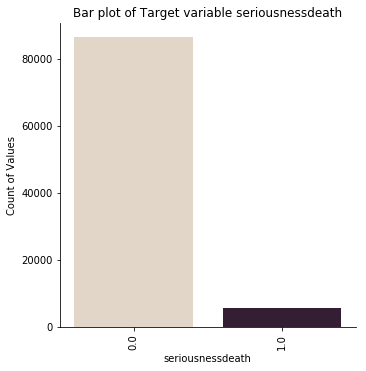

In [128]:
#3.1 BarPlot of target variable 'seriousnessdeath'
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.catplot(x="seriousnessdeath", kind="count",palette="ch:.25", data=drug_reaction_df33)
plt.title('Bar plot of Target variable seriousnessdeath')
plt.xlabel('seriousnessdeath')
plt.ylabel('Count of Values')
plt.xticks(rotation='vertical')
#plt.legend(loc='best')
plt.show()

In [66]:
# The data is imbalanced
# The number of drug reations that resulted in death are much less than non death adverse reation events 
"""
pharmclasspe          28
route                 29
"""
a='a'

In [215]:
np.min(drug_reaction_df33.patientonsetage), np.max(drug_reaction_df33.patientonsetage)

(0.0, 33728.0)

In [141]:
# count of categorical values

drug_reaction_df33['pharmclasspe_count'].unique()

array([nan])

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


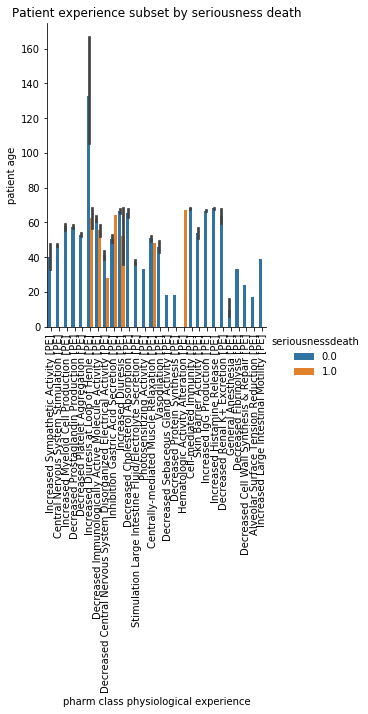

In [150]:
# Factor plot 
#plt.figure(num=None, dpi=80,figsize =(14,6), facecolor='w', edgecolor='k')
sns.catplot('pharmclasspe', 'patientonsetage', hue='seriousnessdeath', data=drug_reaction_df33, kind='bar')
plt.title('Patient experience subset by seriousness death')
plt.xlabel('pharm class physiological experience')
plt.ylabel('patient age')
plt.xticks(rotation='vertical')
#plt.legend(loc='best')
plt.show()

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


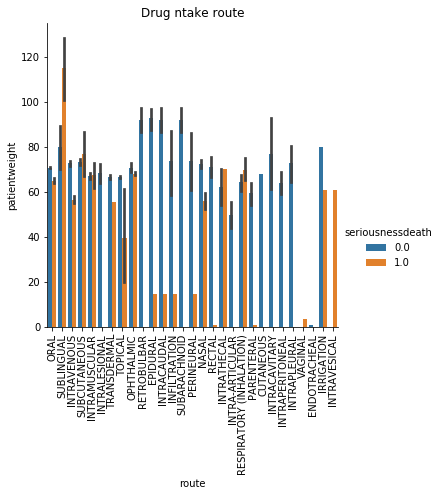

In [186]:
# Factor plot 
#plt.figure(num=None, dpi=80,figsize =(14,6), facecolor='w', edgecolor='k')
sns.catplot('route', 'patientweight', hue='seriousnessdeath', data=drug_reaction_df33, kind='bar')
plt.title('Drug ntake route')
plt.xlabel('route')
plt.ylabel('patientweight')
plt.xticks(rotation='vertical')
#plt.legend(loc='best')
plt.show()

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


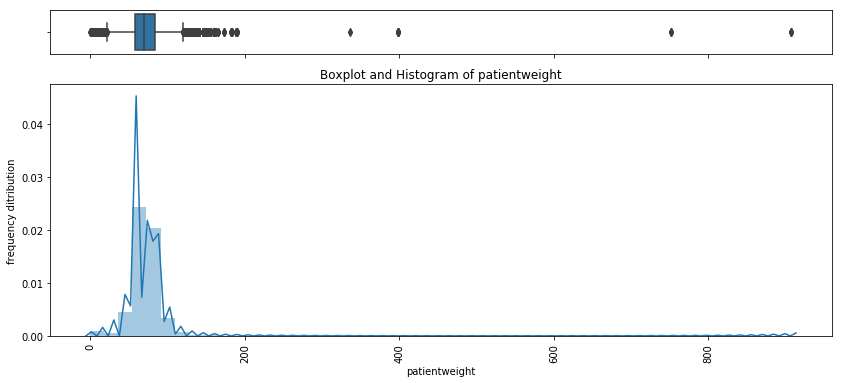

In [397]:
# Histogram of 'patientweight'

# Multiple plots boxplot and histograms in the same window
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, figsize =(14,6),sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(drug_reaction_df33["patientweight"], ax=ax_box)
sns.distplot(drug_reaction_df33["patientweight"], ax=ax_hist) 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.title('Boxplot and Histogram of patientweight')
plt.xlabel('patientweight')
plt.ylabel('frequency ditribution')
plt.xticks(rotation='vertical')
#plt.legend(loc='best')
plt.show()

In [402]:
# patientweight distribution is skwed and shows outliers hence has to be transformed
# plot histogram of log transformation of EngineSize
# Add 1 to replace zero before log transform

drug_reaction_df33.loc[:,"patientweightLog"] = (drug_reaction_df33.loc[:,"patientweight"]+1).apply(np.log)

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


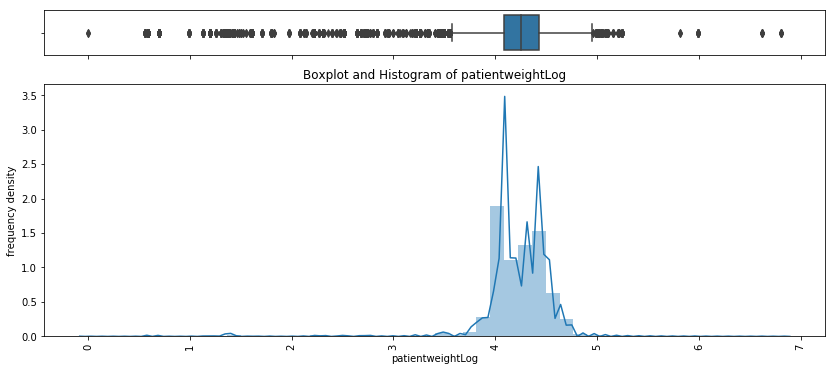

In [403]:
# Histogram of 'EngineSizeLog'
# Multiple histograms in the same window
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, figsize =(14,6),sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(drug_reaction_df33["patientweightLog"], ax=ax_box)
sns.distplot(drug_reaction_df33["patientweightLog"], ax=ax_hist) 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.title('Boxplot and Histogram of patientweightLog')
plt.xlabel('patientweightLog')
plt.ylabel('frequency density')
plt.xticks(rotation='vertical')
plt.show()

In [413]:
drug_reaction_df33.patientsex.unique()

array([ 2.,  1., nan,  0.])

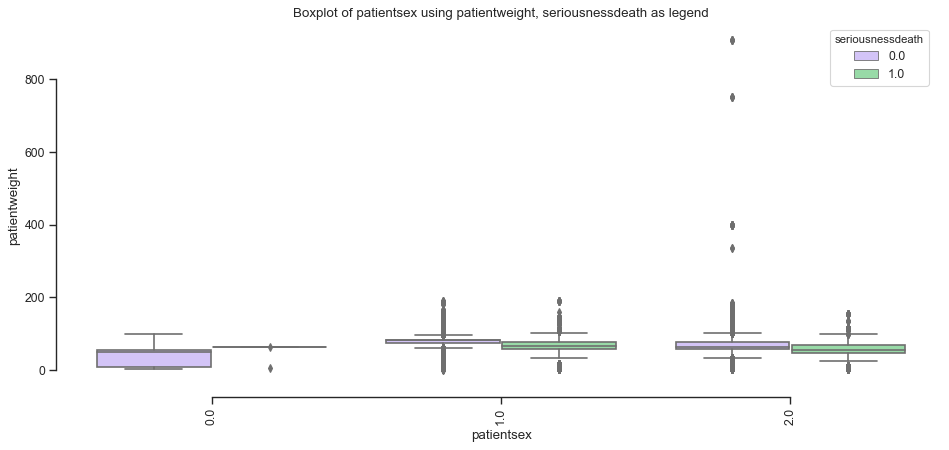

In [414]:
# grouped boxplot
drug_reaction_df33.patientsex = drug_reaction_df33.patientsex.fillna(0)
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
plt.figure(num=None, dpi=80,figsize =(14,6), facecolor='w', edgecolor='k')
#f, axes = plt.subplots(1, 1, figsize=(14, 14), sharex=True)
sns.boxplot(x="patientsex", y="patientweight",
            hue="seriousnessdeath", palette=["m", "g"],
            data=drug_reaction_df33)
sns.despine(offset=10, trim=True)
plt.title('Boxplot of patientsex using patientweight, seriousnessdeath as legend' )
plt.xlabel('patientsex')
plt.ylabel('patientweight')
plt.xticks(rotation='vertical')
#plt.legend(loc='best')
plt.show()

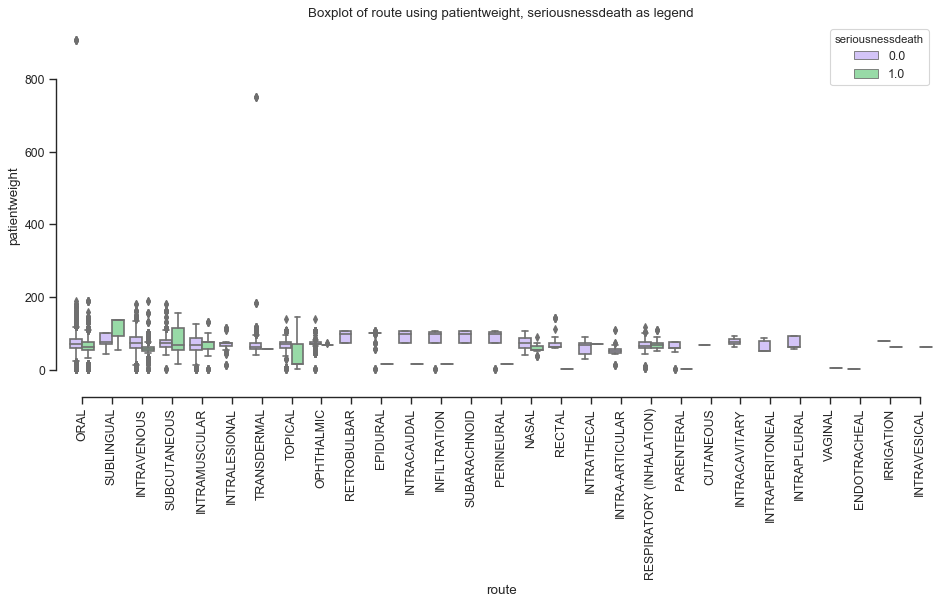

In [405]:
# grouped boxplot

sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
plt.figure(num=None, dpi=80,figsize =(14,6), facecolor='w', edgecolor='k')
#f, axes = plt.subplots(1, 1, figsize=(14, 14), sharex=True)
sns.boxplot(x="route", y="patientweight",
            hue="seriousnessdeath", palette=["m", "g"],
            data=drug_reaction_df33)
sns.despine(offset=10, trim=True)
plt.title('Boxplot of route using patientweight, seriousnessdeath as legend' )
plt.xlabel('route')
plt.ylabel('patientweight')
plt.xticks(rotation='vertical')
#plt.legend(loc='best')
plt.show()

In [187]:
#Feature extraction, transformation and engineering
# feature were extracted using word3vec in text variables with very high number of categorical values
# Also numerical values such as Age was also categorised by biining into groups as seriousness of adverse drug effect
# varies with age groups.

In [188]:
drug_reaction_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92130 entries, 0 to 92129
Data columns (total 33 columns):
unnamed:0                     92130 non-null int64
drugadministrationroute       27530 non-null float64
drugcharacterization          92130 non-null int64
drugdosagetext                32567 non-null object
drugenddate                   33222 non-null float64
drugenddateformat             33222 non-null float64
drugindication                41829 non-null object
drugstartdate                 42313 non-null float64
drugstartdateformat           42313 non-null float64
fulfillexpeditecriteria       92130 non-null int64
genericname                   75641 non-null object
medicinalproduct              92130 non-null object
patientonsetage               87098 non-null float64
patientonsetageunit           88275 non-null float64
patientsex                    92057 non-null float64
patientweight                 92130 non-null float64
pharmclasscs                  57861 non-null object
p

In [189]:
#  check the unique values of Drugdosagetext

drug_reaction_df3.drugdosagetext[10:1000].unique()

array([nan, '400 MG PRN ORAL', '200 MG, QD', '500 MG, UNK', 'UNK, UNK',
       '5 GM; IV', '25 MG; IV, 75 MG; IV', 'TOTAL DAILY DOSE: 400 MG',
       '250 MG PO', '80 MG, UNK', '80 MG, QD', '3 MU TIW SUBCUTANEOUS',
       '1000 MG QD ORAL', 'FORM: INFUSION.', 'DAILY DOSE:10MG',
       'DAILY DOSE: UNK. FREQUENCY:UNKNOWN', 'DAILY DOSE: 1 DF.',
       'DOSAGE DURATION: 5 DAYS.', '725 MG,  INTRAVENOUS',
       '3 MG DAILY ORAL', '1.2 MG, ONCE/SINGLE, ORAL', '250 MG',
       '3500 IU (3500 IU), SUBCUTANEOUS', '40 UG DAY', '40 U DAY',
       'QHS, ORAL', 'DAILY.', '440-880 MG, BID, ORAL', '200MG PER DAY',
       '10MG PER DAY', '5MG PER DAY', '160 MG, QD', '10 MG, QD',
       '5 MG, QD', '2 ML/H, 3 ML/TIME, VIA PCA', '16UT/DAY',
       '40MG PER DAY', '60 MG Q12H', '220 MG, QD, ORAL', '30 MG BID',
       '1 DOSE(S), 3 IN 4 WEEK, TRANSDERMAL',
       '1 DOSE (S), 3 IN 4 WEEK, TRANSDERMAL', '10 MG PO',
       '10 MG, 4 IN 1 DAY', '90 MG  2 PER DAY  SUBCUTANEOUS',
       '1320 MG, TOTAL DAILY,

In [194]:
# comment
# There are many unique values in the text columns,the data will be preprocessed by 
# replacing missing value
# lower casing of the text
# vectorisation of the values using word2vec 

In [195]:
# change values to lower case and replace missing values

drug_reaction_df3a = drug_reaction_df3.copy()

drug_reaction_df3a.drugdosagetext = drug_reaction_df3a.drugdosagetext.str.lower().fillna('missing') # lower casing

# display for quality control
drug_reaction_df3a.drugdosagetext[10:1000].unique()


array(['missing', '400 mg prn oral', '200 mg, qd', '500 mg, unk',
       'unk, unk', '5 gm; iv', '25 mg; iv, 75 mg; iv',
       'total daily dose: 400 mg', '250 mg po', '80 mg, unk', '80 mg, qd',
       '3 mu tiw subcutaneous', '1000 mg qd oral', 'form: infusion.',
       'daily dose:10mg', 'daily dose: unk. frequency:unknown',
       'daily dose: 1 df.', 'dosage duration: 5 days.',
       '725 mg,  intravenous', '3 mg daily oral',
       '1.2 mg, once/single, oral', '250 mg',
       '3500 iu (3500 iu), subcutaneous', '40 ug day', '40 u day',
       'qhs, oral', 'daily.', '440-880 mg, bid, oral', '200mg per day',
       '10mg per day', '5mg per day', '160 mg, qd', '10 mg, qd',
       '5 mg, qd', '2 ml/h, 3 ml/time, via pca', '16ut/day',
       '40mg per day', '60 mg q12h', '220 mg, qd, oral', '30 mg bid',
       '1 dose(s), 3 in 4 week, transdermal',
       '1 dose (s), 3 in 4 week, transdermal', '10 mg po',
       '10 mg, 4 in 1 day', '90 mg  2 per day  subcutaneous',
       '1320 mg,

In [208]:
# create a function to implement vectorisation of each text column
# Comment The word2vec will be implemented using sparksession 
# A function is created to vectorise each of the ten text columns

# 2.3 create a function to vectorise each text column.

def text_vectorize():
    '''This function returns a pandas dataframe and columns of word tokens and the vectors.
    implement word2vec using spark session'''
    
    # select the tokenised word
    word_df = tok_df.select('words') 
    
    # Learn a mapping from words to Vectors.
    text_word2Vec = Word2Vec(vectorSize=3, minCount=0, inputCol="words", outputCol="result")
    
    # fit model using data
    text_model = text_word2Vec.fit(word_df)
    
    # transform using fitted model to output vectors
    vec_df = text_model.transform(word_df)
    
    return vec_df

    

In [197]:
# vectorize drugdosagetext column

dosage_text_df = drug_reaction_df3a.loc[:,['drugdosagetext']].copy()

# create pyspark dataframe
dosage_text_spark = spark.createDataFrame(dosage_text_df)
# tokenize
tokenizer = Tokenizer(inputCol="drugdosagetext", outputCol="words") # tokenise the data in spark_df

tok_df = tokenizer.transform(dosage_text_spark) # tokenize text

# word vectors using function
dosage_vec_df = text_vectorize()

# display for QC of word vectors

for row in dosage_vec_df.take(2):
    print(row)

Row(words=['250', 'mg', 'po'], result=DenseVector([-1.2137, 0.0459, -0.1534]))
Row(words=['250', 'mg', 'po'], result=DenseVector([-1.2137, 0.0459, -0.1534]))


In [198]:
# Add the word vectors to dataframe

# convert spark word vector list to pandas 
dosage_pd_df = dosage_vec_df.toPandas()

# select result and create a list 
dosage_vec_list = dosage_pd_df['result'].tolist()   # convert to python list

# convert to pandas dataframe
dosage_vec_pd_df = pd.DataFrame(dosage_vec_list, columns=['dosagevec1', 'dosagevec2', 'dosagevec3'], index = range(92130)) # to datafram

# set input dataframe index range
drug_reaction_df3a.index = range(92130)

# join the word vector columns to the main dataframe
drug_reaction_df4 = pd.concat([drug_reaction_df3a, dosage_vec_pd_df], axis=1)

drug_reaction_df4.head(3)

,unnamed:0,drugadministrationroute,drugcharacterization,drugdosagetext,drugenddate,drugenddateformat,drugindication,drugstartdate,drugstartdateformat,fulfillexpeditecriteria,...,serious,seriousnessdeath,seriousnesshospitalization,seriousnessother,substancename,transmissiondate,transmissiondateformat,dosagevec1,dosagevec2,dosagevec3
0,2,48.0,1,250 mg po,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,2,...,1,NaN,NaN,1.0,GEFITINIB,20070707,102,-1.213662,0.045872,-0.153395
1,3,48.0,1,250 mg po,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,2,...,1,NaN,NaN,1.0,GEFITINIB,20070707,102,-1.213662,0.045872,-0.153395
2,4,48.0,1,250 mg po,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,2,...,1,NaN,NaN,1.0,GEFITINIB,20070707,102,-1.213662,0.045872,-0.153395


In [199]:
# medicinalproduct text column
#change values to lower case and replace missing values

drug_reaction_df5 = drug_reaction_df4.copy()

drug_reaction_df5.medicinalproduct = drug_reaction_df5.medicinalproduct.str.lower().fillna('missing') # lower casing

# display for quality control
drug_reaction_df5.medicinalproduct[0:100].unique()

array(['iressa', 'lipitor', 'pain medication', 'synthroid',
       'tamoxifen citrate', 'valium', 'librium', 'dalmane',
       'amitriptyline hydrochloride', 'morphine', 'methadon hcl tab',
       'propoxyphene hydrochloride', 'amphetamine sulfate', 'provigil',
       'sandimmune', 'anabolic steroids', 'neupogen',
       'adrenal cortex hormon', 'doxorubicin hydroclhoride (doxil)',
       'taxol', 'cisplatin'], dtype=object)

In [200]:
# vectorize medicinalproduct

medicine_text_df = drug_reaction_df5.loc[:,['medicinalproduct']].copy()

# create pyspark dataframe
medicine_text_spark = spark.createDataFrame(medicine_text_df)

tokenizer = Tokenizer(inputCol="medicinalproduct", outputCol="words") # tokenise the data in spark_df

tok_df = tokenizer.transform(medicine_text_spark) # tokenize text
# output word vectors using function
medicine_vec_df = text_vectorize()

# display for QC of word vectors

for row in medicine_vec_df.take(2):
    print(row)

Row(words=['iressa'], result=DenseVector([0.0412, -0.1344, 0.1016]))
Row(words=['iressa'], result=DenseVector([0.0412, -0.1344, 0.1016]))


In [201]:
# Add the word vectors to dataframe

# convert spark word vector list to pandas 
medicine_pd_df = medicine_vec_df.toPandas()

# select result and create a list 
medicine_vec_list = medicine_pd_df['result'].tolist()   # convert to python list

# convert to pandas dataframe
medicine_vec_pd_df = pd.DataFrame(medicine_vec_list, columns=['medvec1', 'medvec2', 'medvec3'], index = range(92130)) # to datafram

# set input dataframe index range
drug_reaction_df5.index = range(92130)

# join the word vector columns to the main dataframe
drug_reaction_df6 = pd.concat([drug_reaction_df5, medicine_vec_pd_df], axis=1)

drug_reaction_df6.head(3)


,unnamed:0,drugadministrationroute,drugcharacterization,drugdosagetext,drugenddate,drugenddateformat,drugindication,drugstartdate,drugstartdateformat,fulfillexpeditecriteria,...,seriousnessother,substancename,transmissiondate,transmissiondateformat,dosagevec1,dosagevec2,dosagevec3,medvec1,medvec2,medvec3
0,2,48.0,1,250 mg po,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,2,...,1.0,GEFITINIB,20070707,102,-1.213662,0.045872,-0.153395,0.041178,-0.134399,0.101592
1,3,48.0,1,250 mg po,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,2,...,1.0,GEFITINIB,20070707,102,-1.213662,0.045872,-0.153395,0.041178,-0.134399,0.101592
2,4,48.0,1,250 mg po,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,2,...,1.0,GEFITINIB,20070707,102,-1.213662,0.045872,-0.153395,0.041178,-0.134399,0.101592


In [202]:
# vectorise reactionmeddrapt

# change values to lower case and replace missing values

drug_reaction_df7 = drug_reaction_df6.copy()

drug_reaction_df7.reactionmeddrapt = drug_reaction_df7.reactionmeddrapt.str.lower().fillna('missing') # lower casing

# display for quality control
drug_reaction_df7.reactionmeddrapt[10:100].unique()

array(['bone pain', 'haemoptysis', 'pulmonary congestion',
       'uterine neoplasm', 'weight increased', 'drug toxicity',
       'pulmonary oedema', 'abortion missed',
       'drug exposure during pregnancy', 'foetal growth retardation',
       'pregnancy', 'death', 'aspiration', 'cardiac arrest',
       'dehydration', 'diarrhoea', 'hypokalaemia', 'metabolic acidosis',
       'neutropenia', 'ovarian cancer', 'renal failure',
       'respiratory arrest'], dtype=object)

In [209]:
# vectorize medicinalproduct

reactionmed_text_df = drug_reaction_df7.loc[:,['reactionmeddrapt']].copy()

# create pyspark dataframe
reactionmed_text_spark = spark.createDataFrame(reactionmed_text_df)

tokenizer = Tokenizer(inputCol="reactionmeddrapt", outputCol="words") # tokenise the data in spark_df

tok_df = tokenizer.transform(reactionmed_text_spark) # tokenize text
# output word vectors using function
reactionmed_vec_df = text_vectorize()

# display for QC of word vectors

for row in reactionmed_vec_df.take(2):
    print(row)


Row(words=['diarrhoea'], result=DenseVector([-0.2212, 0.0213, 0.04]))
Row(words=['oedema', 'mouth'], result=DenseVector([0.0337, 0.1118, 0.613]))


In [211]:
# vectorize reactionmeddrapt

# Add the word vectors to dataframe

# convert spark word vector list to pandas 
reaction_pd_df = reactionmed_vec_df.toPandas()

# select result and create a list 
reaction_vec_list = reaction_pd_df['result'].tolist()   # convert to python list

# convert to pandas dataframe
reaction_vec_pd_df = pd.DataFrame(reaction_vec_list, columns=['reactionvec1', 'reactionvec2', 'reactionvec3'], index = range(92130)) # to datafram

# set input dataframe index range
drug_reaction_df7.index = range(92130)

# join the word vector columns to the main dataframe
drug_reaction_df8 = pd.concat([drug_reaction_df7, reaction_vec_pd_df], axis=1)

drug_reaction_df8.head(3)

,unnamed:0,drugadministrationroute,drugcharacterization,drugdosagetext,drugenddate,drugenddateformat,drugindication,drugstartdate,drugstartdateformat,fulfillexpeditecriteria,...,transmissiondateformat,dosagevec1,dosagevec2,dosagevec3,medvec1,medvec2,medvec3,reactionvec1,reactionvec2,reactionvec3
0,2,48.0,1,250 mg po,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,2,...,102,-1.213662,0.045872,-0.153395,0.041178,-0.134399,0.101592,-0.221157,0.021303,0.039954
1,3,48.0,1,250 mg po,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,2,...,102,-1.213662,0.045872,-0.153395,0.041178,-0.134399,0.101592,0.033726,0.111824,0.612965
2,4,48.0,1,250 mg po,NaN,NaN,NON-SMALL CELL LUNG CANCER,NaN,NaN,2,...,102,-1.213662,0.045872,-0.153395,0.041178,-0.134399,0.101592,-0.116874,0.756426,-0.452332


In [ ]:
drug_reaction_df8.info()

In [212]:
# vectorise drugindication

# change values to lower case and replace missing values

drug_reaction_df9 = drug_reaction_df8.copy()

drug_reaction_df9.drugindication = drug_reaction_df9.drugindication.str.lower().fillna('missing') # lower casing

# display for quality control
drug_reaction_df9.drugindication[10:100].unique()

array(['missing', 'non-small cell lung cancer', 'adenocarcinoma',
       'breast cancer', 'breast cancer in situ',
       'drug use for unknown indication', 'narcolepsy',
       'aplastic anaemia', 'ovarian cancer'], dtype=object)

In [213]:
# vectorize drugindication

indication_text_df = drug_reaction_df9.loc[:,['drugindication']].copy()

# create pyspark dataframe
indication_spark = spark.createDataFrame(indication_text_df)

tokenizer = Tokenizer(inputCol="drugindication", outputCol="words") # tokenise the data in spark_df

tok_df = tokenizer.transform(indication_spark) # tokenize text
# output word vectors using function
indication_vec_df = text_vectorize()

# display for QC of word vectors

for row in indication_vec_df.take(2):
    print(row)

Row(words=['non-small', 'cell', 'lung', 'cancer'], result=DenseVector([-1.8399, -0.1874, 0.2132]))
Row(words=['non-small', 'cell', 'lung', 'cancer'], result=DenseVector([-1.8399, -0.1874, 0.2132]))


In [214]:
# Add the word vectors to dataframe

# convert spark word vector list to pandas 
indication_pd_df = indication_vec_df.toPandas()

# select result and create a list 
indication_vec_list = indication_pd_df['result'].tolist()   # convert to python list

# convert to pandas dataframe
indication_vec_pd_df = pd.DataFrame(indication_vec_list, columns=['indicationvec1', 'indicationvec2', 'indicationvec3'], index = range(92130)) # to datafram

# set input dataframe index range
drug_reaction_df9.index = range(92130)

# join the word vector columns to the main dataframe
drug_reaction_df10 = pd.concat([drug_reaction_df9, reaction_vec_pd_df], axis=1)

drug_reaction_df10.head(3)

,unnamed:0,drugadministrationroute,drugcharacterization,drugdosagetext,drugenddate,drugenddateformat,drugindication,drugstartdate,drugstartdateformat,fulfillexpeditecriteria,...,dosagevec3,medvec1,medvec2,medvec3,reactionvec1,reactionvec2,reactionvec3,reactionvec1,reactionvec2,reactionvec3
0,2,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.153395,0.041178,-0.134399,0.101592,-0.221157,0.021303,0.039954,-0.221157,0.021303,0.039954
1,3,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.153395,0.041178,-0.134399,0.101592,0.033726,0.111824,0.612965,0.033726,0.111824,0.612965
2,4,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.153395,0.041178,-0.134399,0.101592,-0.116874,0.756426,-0.452332,-0.116874,0.756426,-0.452332


In [215]:
# vectorise substancename

# change values to lower case and replace missing values

drug_reaction_df11 = drug_reaction_df10.copy()

drug_reaction_df11.substancename = drug_reaction_df11.substancename.str.lower().fillna('missing') # lower casing

# display for quality control
drug_reaction_df11.substancename[10:100].unique()

array(['atorvastatin calcium trihydrate', 'missing',
       'levothyroxine sodium', 'gefitinib', 'tamoxifen citrate',
       'diazepam', 'amitriptyline hydrochloride', 'morphine',
       'abt-925 anhydrous free base', 'propoxyphene hydrochloride',
       'amphetamine sulfate', 'modafinil', 'cyclosporine', 'filgrastim',
       'cisplatin'], dtype=object)

In [216]:
# vectorize substancename

substance_text_df = drug_reaction_df11.loc[:,['substancename']].copy()

# create pyspark dataframe
substance_spark = spark.createDataFrame(substance_text_df)

tokenizer = Tokenizer(inputCol="substancename", outputCol="words") # tokenise the data in spark_df

tok_df = tokenizer.transform(substance_spark) # tokenize text
# output word vectors using function
substance_vec_df = text_vectorize()

# display for QC of word vectors

for row in substance_vec_df.take(2):
    print(row)

Row(words=['gefitinib'], result=DenseVector([0.126, 0.1174, -0.0509]))
Row(words=['gefitinib'], result=DenseVector([0.126, 0.1174, -0.0509]))


In [217]:
# Add the word vectors to dataframe

# convert spark word vector list to pandas 
substance_pd_df = substance_vec_df.toPandas()

# select result and create a list 
substance_vec_list = substance_pd_df['result'].tolist()   # convert to python list

# convert to pandas dataframe
substance_vec_pd_df = pd.DataFrame(substance_vec_list, columns=['substancevec1', 'substancevec2', 'substancevec3'], index = range(92130)) # to datafram

# set input dataframe index range
drug_reaction_df11.index = range(92130)

# join the word vector columns to the main dataframe
drug_reaction_df12 = pd.concat([drug_reaction_df11, substance_vec_pd_df], axis=1)

drug_reaction_df12.head(3)

,unnamed:0,drugadministrationroute,drugcharacterization,drugdosagetext,drugenddate,drugenddateformat,drugindication,drugstartdate,drugstartdateformat,fulfillexpeditecriteria,...,medvec3,reactionvec1,reactionvec2,reactionvec3,reactionvec1,reactionvec2,reactionvec3,substancevec1,substancevec2,substancevec3
0,2,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,0.101592,-0.221157,0.021303,0.039954,-0.221157,0.021303,0.039954,0.125976,0.117379,-0.05095
1,3,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,0.101592,0.033726,0.111824,0.612965,0.033726,0.111824,0.612965,0.125976,0.117379,-0.05095
2,4,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,0.101592,-0.116874,0.756426,-0.452332,-0.116874,0.756426,-0.452332,0.125976,0.117379,-0.05095


In [218]:
# change values to lower case and replace missing values in pharmclassepc

drug_reaction_df13 = drug_reaction_df12.copy()

drug_reaction_df13.pharmclassepc = drug_reaction_df13.pharmclassepc.str.lower().fillna('missing') # lower casing

# display for quality control
drug_reaction_df13.pharmclassepc[10:100].unique()

array(['missing', 'kinase inhibitor [epc]', 'benzodiazepine [epc]',
       'opioid agonist [epc]', 'sympathomimetic-like agent [epc]',
       'calcineurin inhibitor immunosuppressant [epc]',
       'leukocyte growth factor [epc]', 'platinum-based drug [epc]'],
      dtype=object)

In [219]:
# vectorize substancename

classepc_text_df = drug_reaction_df13.loc[:,['pharmclassepc']].copy()

# create pyspark dataframe
classepc_spark = spark.createDataFrame(classepc_text_df)

tokenizer = Tokenizer(inputCol="pharmclassepc", outputCol="words") # tokenise the data in spark_df

tok_df = tokenizer.transform(classepc_spark) # tokenize text
# output word vectors using function
classepc_vec_df = text_vectorize()

# display for QC of word vectors

for row in classepc_vec_df.take(2):
    print(row)

Row(words=['kinase', 'inhibitor', '[epc]'], result=DenseVector([1.0056, 0.6482, -0.1345]))
Row(words=['kinase', 'inhibitor', '[epc]'], result=DenseVector([1.0056, 0.6482, -0.1345]))


In [220]:
# Add the word vectors to dataframe

# convert spark word vector list to pandas 
classepc_pd_df = classepc_vec_df.toPandas()

# select result and create a list 
classepc_vec_list = classepc_pd_df['result'].tolist()   # convert to python list

# convert to pandas dataframe
classepc_vec_pd_df = pd.DataFrame(classepc_vec_list, columns=['classepcvec1', 'classepcvec2', 'classepcvec3'], index = range(92130)) # to datafram

# set input dataframe index range
drug_reaction_df13.index = range(92130)

# join the word vector columns to the main dataframe
drug_reaction_df14 = pd.concat([drug_reaction_df13, classepc_vec_pd_df], axis=1)

drug_reaction_df14.head(3)

,unnamed:0,drugadministrationroute,drugcharacterization,drugdosagetext,drugenddate,drugenddateformat,drugindication,drugstartdate,drugstartdateformat,fulfillexpeditecriteria,...,reactionvec3,reactionvec1,reactionvec2,reactionvec3,substancevec1,substancevec2,substancevec3,classepcvec1,classepcvec2,classepcvec3
0,2,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,0.039954,-0.221157,0.021303,0.039954,0.125976,0.117379,-0.05095,1.005588,0.648181,-0.13448
1,3,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,0.612965,0.033726,0.111824,0.612965,0.125976,0.117379,-0.05095,1.005588,0.648181,-0.13448
2,4,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.452332,-0.116874,0.756426,-0.452332,0.125976,0.117379,-0.05095,1.005588,0.648181,-0.13448


In [221]:
# vectorise pharmclasscs column

# change values to lower case and replace missing values in pharmclassepc

drug_reaction_df15 = drug_reaction_df14.copy()

drug_reaction_df15.pharmclasscs = drug_reaction_df15.pharmclasscs.str.lower().fillna('missing') # lower casing

# display for quality control
drug_reaction_df15.pharmclasscs[10:100].unique()

array(['missing', 'benzodiazepines [chemical/ingredient]',
       'granulocyte-macrophage colony-stimulating factor [chemical/ingredient]',
       'granulocyte colony-stimulating factor [chemical/ingredient]',
       'platinum-containing compounds [chemical/ingredient]'],
      dtype=object)

In [222]:
# vectorize pharmclasscs

pharmclasscs_text_df = drug_reaction_df15.loc[:,['pharmclasscs']].copy()

# create pyspark dataframe
pharmclasscs_spark = spark.createDataFrame(pharmclasscs_text_df)

tokenizer = Tokenizer(inputCol="pharmclasscs", outputCol="words") # tokenise the data in spark_df

tok_df = tokenizer.transform(pharmclasscs_spark) # tokenize text

# output word vectors using function
pharmclasscs_vec_df = text_vectorize()

# display for QC of word vectors

for row in pharmclasscs_vec_df.take(2):
    print(row)

Row(words=['missing'], result=DenseVector([0.0045, 0.1289, -0.0068]))
Row(words=['missing'], result=DenseVector([0.0045, 0.1289, -0.0068]))


In [223]:
# Add the word vectors to dataframe

# convert spark word vector list to pandas 
pharmclasscs_pd_df = pharmclasscs_vec_df.toPandas()

# select result and create a list 
pharmclasscs_vec_list = pharmclasscs_pd_df['result'].tolist()   # convert to python list

# convert to pandas dataframe
pharmclasscs_vec_pd_df = pd.DataFrame(pharmclasscs_vec_list, columns=['pharmclasscsvec1', 'pharmclasscsvec2', 'pharmclasscsvec3'], index = range(92130)) # to datafram

# set input dataframe index range
drug_reaction_df15.index = range(92130)

# join the word vector columns to the main dataframe
drug_reaction_df16 = pd.concat([drug_reaction_df15, pharmclasscs_vec_pd_df], axis=1)

drug_reaction_df16.head(3)

,unnamed:0,drugadministrationroute,drugcharacterization,drugdosagetext,drugenddate,drugenddateformat,drugindication,drugstartdate,drugstartdateformat,fulfillexpeditecriteria,...,reactionvec3,substancevec1,substancevec2,substancevec3,classepcvec1,classepcvec2,classepcvec3,pharmclasscsvec1,pharmclasscsvec2,pharmclasscsvec3
0,2,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,0.039954,0.125976,0.117379,-0.05095,1.005588,0.648181,-0.13448,0.004521,0.128879,-0.006839
1,3,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,0.612965,0.125976,0.117379,-0.05095,1.005588,0.648181,-0.13448,0.004521,0.128879,-0.006839
2,4,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.452332,0.125976,0.117379,-0.05095,1.005588,0.648181,-0.13448,0.004521,0.128879,-0.006839


In [224]:
# change values to lower case and replace missing values in pharmclasspe

drug_reaction_df17 = drug_reaction_df16.copy()

drug_reaction_df17.pharmclasspe = drug_reaction_df17.pharmclasspe.str.lower().fillna('missing') # lower casing

# display for quality control
drug_reaction_df17.pharmclasspe[10:100].unique()

array(['missing', 'increased sympathetic activity [pe]',
       'central nervous system stimulation [pe]',
       'increased myeloid cell production [pe]'], dtype=object)

In [225]:
# vectorize  pharmclasspe

pharmclasspe_text_df = drug_reaction_df17.loc[:,['pharmclasspe']].copy()

# create pyspark dataframe
pharmclasspe_spark = spark.createDataFrame( pharmclasspe_text_df)

tokenizer = Tokenizer(inputCol="pharmclasspe", outputCol="words") # tokenise the data in spark_df

tok_df = tokenizer.transform(pharmclasspe_spark) # tokenize text

# output word vectors using function
pharmclasspe_vec_df = text_vectorize()

# display for QC of word vectors

for row in pharmclasspe_vec_df.take(2):
    print(row)

Row(words=['missing'], result=DenseVector([0.1347, -0.0305, 0.0036]))
Row(words=['missing'], result=DenseVector([0.1347, -0.0305, 0.0036]))


In [226]:
# Add the word vectors to dataframe

# convert spark word vector list to pandas 
pharmclasspe_pd_df = pharmclasspe_vec_df.toPandas()

# select result and create a list 
pharmclasspe_vec_list = pharmclasspe_pd_df['result'].tolist()   # convert to python list

# convert to pandas dataframe
pharmclasspe_vec_pd_df = pd.DataFrame(pharmclasspe_vec_list, columns=['pharmclasspevec1', 'pharmclasspevec2', 'pharmclasspevec3'], index = range(92130)) # to datafram

# set input dataframe index range
drug_reaction_df17.index = range(92130)

# join the word vector columns to the main dataframe
drug_reaction_df18 = pd.concat([drug_reaction_df17, pharmclasspe_vec_pd_df], axis=1)

drug_reaction_df18.head(3)

,unnamed:0,drugadministrationroute,drugcharacterization,drugdosagetext,drugenddate,drugenddateformat,drugindication,drugstartdate,drugstartdateformat,fulfillexpeditecriteria,...,substancevec3,classepcvec1,classepcvec2,classepcvec3,pharmclasscsvec1,pharmclasscsvec2,pharmclasscsvec3,pharmclasspevec1,pharmclasspevec2,pharmclasspevec3
0,2,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.05095,1.005588,0.648181,-0.13448,0.004521,0.128879,-0.006839,0.134725,-0.030515,0.003595
1,3,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.05095,1.005588,0.648181,-0.13448,0.004521,0.128879,-0.006839,0.134725,-0.030515,0.003595
2,4,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.05095,1.005588,0.648181,-0.13448,0.004521,0.128879,-0.006839,0.134725,-0.030515,0.003595


In [227]:
# change values to lower case and replace missing values in route

drug_reaction_df19 = drug_reaction_df18.copy()

drug_reaction_df19.route = drug_reaction_df19.route.str.lower().fillna('missing') # lower casing

# display for quality control
drug_reaction_df19.route.unique()

array(['oral', 'missing', 'sublingual', 'intravenous', 'subcutaneous',
       'intramuscular', 'intralesional', 'transdermal', 'topical',
       'ophthalmic', 'retrobulbar', 'epidural', 'intracaudal',
       'infiltration', 'subarachnoid', 'perineural', 'nasal', 'rectal',
       'intrathecal', 'intra-articular', 'respiratory (inhalation)',
       'parenteral', 'cutaneous', 'intracavitary', 'intraperitoneal',
       'intrapleural', 'vaginal', 'endotracheal', 'irrigation',
       'intravesical'], dtype=object)

In [ ]:
drug_reaction_df19.info()

In [228]:
# vectorize  route

route_text_df = drug_reaction_df19.loc[:,['route']].copy()

# create pyspark dataframe
route_spark = spark.createDataFrame(route_text_df)

tokenizer = Tokenizer(inputCol="route", outputCol="words") # tokenise the data in spark_df

tok_df = tokenizer.transform(route_spark) # tokenize text

# output word vectors using function
route_vec_df = text_vectorize()

# display for QC of word vectors

for row in route_vec_df.take(2):
    print(row)

Row(words=['oral'], result=DenseVector([0.1347, -0.0305, 0.0036]))
Row(words=['oral'], result=DenseVector([0.1347, -0.0305, 0.0036]))


In [229]:
# Add the word vectors to dataframe

# convert spark word vector list to pandas 
route_pd_df = route_vec_df.toPandas()

# select result and create a list 
route_vec_list = route_pd_df['result'].tolist()   # convert to python list

# convert to pandas dataframe
route_vec_pd_df = pd.DataFrame(route_vec_list, columns=['routevec1', 'routevec2', 'routevec3'], index = range(92130)) # to datafram

# set input dataframe index range
drug_reaction_df19.index = range(92130)

# join the word vector columns to the main dataframe
drug_reaction_df20 = pd.concat([drug_reaction_df19, route_vec_pd_df], axis=1)

drug_reaction_df20.head(3)

,unnamed:0,drugadministrationroute,drugcharacterization,drugdosagetext,drugenddate,drugenddateformat,drugindication,drugstartdate,drugstartdateformat,fulfillexpeditecriteria,...,classepcvec3,pharmclasscsvec1,pharmclasscsvec2,pharmclasscsvec3,pharmclasspevec1,pharmclasspevec2,pharmclasspevec3,routevec1,routevec2,routevec3
0,2,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.13448,0.004521,0.128879,-0.006839,0.134725,-0.030515,0.003595,0.134725,-0.030515,0.003595
1,3,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.13448,0.004521,0.128879,-0.006839,0.134725,-0.030515,0.003595,0.134725,-0.030515,0.003595
2,4,48.0,1,250 mg po,NaN,NaN,non-small cell lung cancer,NaN,NaN,2,...,-0.13448,0.004521,0.128879,-0.006839,0.134725,-0.030515,0.003595,0.134725,-0.030515,0.003595


In [231]:
#save out data to csv

# Save the cleaned dataframe to disk1 as a csv file

drug_reaction_df20.to_csv("C:/Users/yasser/Desktop/Godly_appl/AstraZeneca/drug_reaction_df20.csv")   # save out the data to disc


In [232]:
# drop vectorized columns
# drop vectorised columns
text_drop_cols = ['drugdosagetext','drugindication','genericname','medicinalproduct','pharmclasscs','pharmclasscs',
                  'pharmclassepc','pharmclasspe','reactionmeddrapt','route','substancename']
drug_reaction_df21 = drug_reaction_df20.copy()
drug_reaction_df21 = drug_reaction_df21.drop(drug_reaction_df21[text_drop_cols], axis = 1)

In [233]:
drug_reaction_df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92130 entries, 0 to 92129
Data columns (total 50 columns):
unnamed:0                     92130 non-null int64
drugadministrationroute       27530 non-null float64
drugcharacterization          92130 non-null int64
drugenddate                   33222 non-null float64
drugenddateformat             33222 non-null float64
drugstartdate                 42313 non-null float64
drugstartdateformat           42313 non-null float64
fulfillexpeditecriteria       92130 non-null int64
patientonsetage               87098 non-null float64
patientonsetageunit           88275 non-null float64
patientsex                    92057 non-null float64
patientweight                 92130 non-null float64
qualification                 76828 non-null float64
receiptdate                   92130 non-null int64
receiptdateformat             92130 non-null int64
receivedate                   92130 non-null int64
receivedateformat             92130 non-null int64
seri

In [234]:
# patientonsetage and patientweight contain missing values
# Hence replace missing values with median and bin the variables
# The variables containing missing values are not skews hence the column mean value will be used to imput missing values

drug_reaction_df22 = drug_reaction_df21.copy()

drug_reaction_df22 = drug_reaction_df22.iloc[:,1:54]

# missing value for patientweight
drug_reaction_df22['patientweight'] = drug_reaction_df22['patientweight'].fillna((drug_reaction_df22['patientweight'].median()))

# missing value for patientonsetage
drug_reaction_df22['patientonsetage'] = drug_reaction_df22['patientonsetage'].fillna((drug_reaction_df22['patientonsetage'].median()))

# fill with mean as the values are not skewed

drug_reaction_df22['patientsex'] = drug_reaction_df22['patientsex'].fillna((drug_reaction_df22['patientsex'].mean()))

drug_reaction_df22['qualification'] = drug_reaction_df22['qualification'].fillna((drug_reaction_df22['qualification'].mean()))

drug_reaction_df22['serious'] = drug_reaction_df22['serious'].fillna((drug_reaction_df22['serious'].mean()))

# seriousnessdeath is the target variable,values are 1 and 0
drug_reaction_df22.seriousnessdeath = drug_reaction_df22.seriousnessdeath.fillna(0)

In [ ]:
drug_reaction_df22.info()

In [235]:
#
count_df = drug_reaction_df22[['patientonsetage','patientweight']].copy()
count_df.describe()

,patientonsetage,patientweight
count,92130.000000,92130.000000
mean,123.045772,70.357919
std,1271.263813,20.461773
min,0.000000,0.000000
25%,48.000000,58.300000
50%,58.000000,69.000000
75%,76.000000,83.000000
max,33728.000000,907.647600


In [237]:
# bining age and weight
# bining for patientonsetage

drug_reaction_df22['patientonsetagebin'] = pd.cut(drug_reaction_df22.patientonsetage,bins=4,labels=range(1, 5), retbins=False,include_lowest=True)

drug_reaction_df22['patientonsetagebin'] = drug_reaction_df22['patientonsetagebin'].astype('int64')

drug_reaction_df22['patientweightbin'] = pd.cut(drug_reaction_df22.patientweight,bins=4,labels=range(1, 5), retbins=False,include_lowest=True)

drug_reaction_df22['patientweightbin'] = drug_reaction_df22['patientweightbin'].astype('int64')

In [281]:
drug_reaction_df22['patientonsetagebin'].unique()

array([1, 3, 4, 2], dtype=int64)

In [238]:
drug_reaction_df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92130 entries, 0 to 92129
Data columns (total 51 columns):
drugadministrationroute       27530 non-null float64
drugcharacterization          92130 non-null int64
drugenddate                   33222 non-null float64
drugenddateformat             33222 non-null float64
drugstartdate                 42313 non-null float64
drugstartdateformat           42313 non-null float64
fulfillexpeditecriteria       92130 non-null int64
patientonsetage               92130 non-null float64
patientonsetageunit           88275 non-null float64
patientsex                    92130 non-null float64
patientweight                 92130 non-null float64
qualification                 92130 non-null float64
receiptdate                   92130 non-null int64
receiptdateformat             92130 non-null int64
receivedate                   92130 non-null int64
receivedateformat             92130 non-null int64
serious                       92130 non-null int64
seri

In [239]:
# drop columns after feature extraction

# drop patientage and patientweight
drug_reaction_df23 = drug_reaction_df22.copy()
drug_reaction_df23 = drug_reaction_df23.drop(drug_reaction_df23[['patientonsetage','patientweight','drugadministrationroute',
                                                                 'drugenddate','drugenddateformat','drugstartdate',
                                                                 'drugstartdateformat','patientonsetageunit','receiptdate',
                                                                 'receiptdateformat','receivedateformat',
                                                                 'seriousnessother','seriousnesshospitalization',
                                                                 'seriousnessother','transmissiondate',
                                                                 'transmissiondateformat','receivedate','seriousnessdeath']], axis = 1)
drug_reaction_df23['seriousnessdeath'] = drug_reaction_df22['seriousnessdeath']

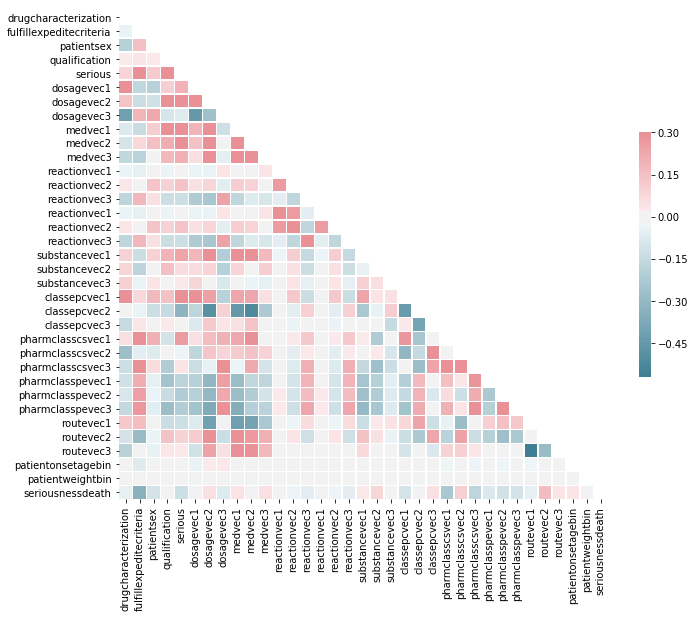

In [240]:
# plot of correlation matrix

# Compute the correlation matrix
corr = drug_reaction_df23.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [241]:
# Features and target data, split the model training and test data

drug_reaction_df24 = drug_reaction_df23.copy()
features_df= drug_reaction_df24.drop(['seriousnessdeath'], axis = 1) # features output

target_df = drug_reaction_df24['seriousnessdeath']  # target output


In [242]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92130 entries, 0 to 92129
Data columns (total 34 columns):
drugcharacterization       92130 non-null int64
fulfillexpeditecriteria    92130 non-null int64
patientsex                 92130 non-null float64
qualification              92130 non-null float64
serious                    92130 non-null int64
dosagevec1                 92130 non-null float64
dosagevec2                 92130 non-null float64
dosagevec3                 92130 non-null float64
medvec1                    92130 non-null float64
medvec2                    92130 non-null float64
medvec3                    92130 non-null float64
reactionvec1               92130 non-null float64
reactionvec2               92130 non-null float64
reactionvec3               92130 non-null float64
reactionvec1               92130 non-null float64
reactionvec2               92130 non-null float64
reactionvec3               92130 non-null float64
substancevec1              92130 non-null float

In [243]:
drug_reaction_df24['seriousnessdeath'].value_counts()

0.0    86372
1.0     5758
Name: seriousnessdeath, dtype: int64

In [277]:
target_df.shape

(92130,)

In [246]:
# features scaling
# Feature scaling improves the convergence of steepest descent algorithms, which do not possess 
#the property of scale invariance
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

std_scale = preprocessing.StandardScaler().fit(features_df)
df_std = std_scale.transform(features_df)
features_scaled_df = df_std


C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [247]:
#5.1  Train test splitting
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Make a train/test split using 20% test size
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, target_df,
                                                    test_size=0.20,
                                                    random_state=21)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (73704, 34)
y_train dataset:  (73704,)
X_test dataset:  (18426, 34)
y_test dataset:  (18426,)


In [248]:
# Resample: Oversampling the training data using SMOTE
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 4592
Before OverSampling, counts of label '0': 69112 

After OverSampling, the shape of train_X: (138224, 34)
After OverSampling, the shape of train_y: (138224,) 

After OverSampling, counts of label '1': 69112
After OverSampling, counts of label '0': 69112


In [249]:
# Feature Seletion  (Recursive Feature Elimination)
# Recursive Feature Elimination (RFE) repeatedly constructs a model and choose eitherthe best or worst 
# performing features. The goal of RFE is to select features by recursively considering smaller 
# and smaller sets of features.

y=target_df
X=features_df
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs',max_iter=200, random_state=0)
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True False False False False  True False  True
  True  True  True  True False  True False  True  True False False  True
  True False  True  True  True  True False  True False  True]
[ 9  1  1 10  1 15 13  2  8  1  3  1  1  1  1  1  5  1  4  1  1 14  6  1
  1  7  1  1  1  1 12  1 11  1]


In [250]:
rfe_score = rfe.score(X_test,y_test)
print(rfe_score)
#print(sorted(zip(map(lambda x: round(x, 4),rfe_score), 
#                 names), reverse=True))

0.9377510040160643


In [251]:
# Create logistic regression model using the resample data
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score,classification_report


In [252]:
# 5.0 Model fitting
#In the binary classification task, the following models are fitted and comapred using different 
# evaluation metrics. Logistic regression, NaiveBias, SVm, RandomForest, XGboost
# Gradient Descent parameter optimisation

In [253]:
# Logistic regaression
# Allfeatures are selected as good for modelling. 

lr = LogisticRegression(C=1.0,solver='lbfgs',max_iter=250, random_state=0)
lr.fit(X_train, y_train)

#Score is Mean Accuracy
logistic_score = lr.score(X_test,y_test)
print( 'logisticregression score: ', logistic_score)

logisticregression score:  0.9375339194616303


In [254]:
# Grid search optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

# Create logistic regression
lrg = LogisticRegression(random_state=0,max_iter=200,solver='lbfgs' )             # initialize the model

# parameter grid
max_iter=[200,250,300,350]
C = [1.0,1.5,2.0,2.5]
# Create hyperparameter options
param_grid = dict(max_iter=max_iter,C=C)

# Grid search
random = RandomizedSearchCV(estimator=lrg, param_distributions=param_grid, cv = 10, scoring = 'accuracy')


In [255]:
random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.938253 using {'max_iter': 250, 'C': 2.0}


In [256]:
# Evaluate the classifier by using accuracy measure
# Apply the trained Classifier to the test data (which, remember, it has never seen before to measure accuracy)
print("classifier accuracy:", random.score(X_test, y_test))  # score model

classifier accuracy: 0.9375339194616303


In [257]:
from sklearn.metrics import confusion_matrix

# predict with best model
# Evaluate the classifier by using confusion matrix compare y predicted to actual y values

# Apply the trained Classifier to the X-test data and make predictions
y_pred = random.predict(X_test)  # use model to predict on test data for generalisation
y_true = y_test
# create confusion matrix

confusion_matrix(y_true, y_pred)

array([[17235,    25],
       [ 1126,    40]], dtype=int64)

In [258]:
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,17235,25,17260
1.0,1126,40,1166
All,18361,65,18426


In [259]:
# precision, recall, F1-score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

precision_recall_fscore_support(y_true, y_pred)

(array([0.93867436, 0.61538462]),
 array([0.99855156, 0.03430532]),
 array([0.9676876 , 0.06498781]),
 array([17260,  1166], dtype=int64))

In [260]:
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      1.00      0.97     17260
     class 1       0.62      0.03      0.06      1166

   micro avg       0.94      0.94      0.94     18426
   macro avg       0.78      0.52      0.52     18426
weighted avg       0.92      0.94      0.91     18426



In [261]:
# RandomForest classifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import roc_auc_score
# Create a random forest Classifier. By convention, rf, put hyperparameters, default
rf = RandomForestClassifier(random_state=0)

# Train the Classifier to take the X-training features and learn how they 
# relate to the y-training target independent variable

rf.fit(X_train, y_train)  # fit model

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [262]:
# Evaluate Randomforest
print("classifier accuracy:", rf.score(X_test, y_test))  # score model

classifier accuracy: 0.9823618799522414


In [263]:
# Apply the trained Classifier to the X-test data and make predictions
rfy_pred = rf.predict(X_test)  # use model to predict on test data for generalisation
y_true = y_test
# create confusion matrix

confusion_matrix(y_true, rfy_pred)

array([[17191,    69],
       [  256,   910]], dtype=int64)

In [264]:
print(classification_report(y_true, rfy_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99     17260
     class 1       0.93      0.78      0.85      1166

   micro avg       0.98      0.98      0.98     18426
   macro avg       0.96      0.89      0.92     18426
weighted avg       0.98      0.98      0.98     18426



Text(0.5,1,'2-class Precision-Recall curve')

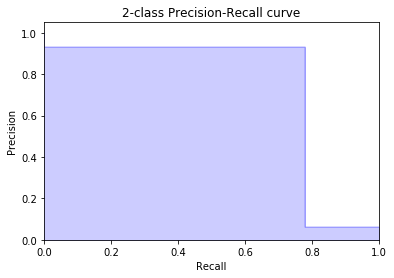

In [265]:
# plot of precission and Recall curve 

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, rfy_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


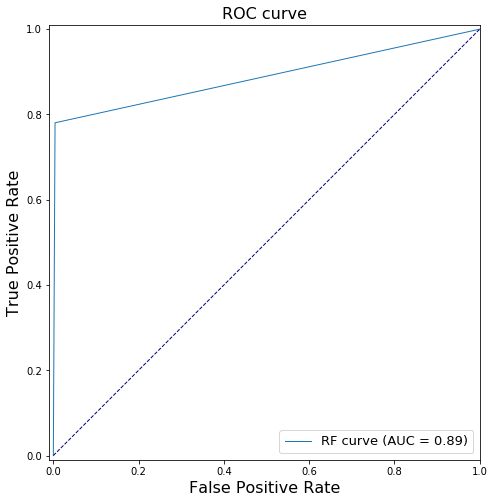

In [266]:
# ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rfy_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))


plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [267]:
# feature Importance
# Rank of the importance of feature
rf.feature_importances_

array([2.56442169e-02, 5.74073846e-02, 2.70068267e-02, 3.86357019e-02,
       1.19883037e-02, 3.56935208e-02, 4.05128143e-02, 3.74158304e-02,
       7.46582903e-02, 8.33864520e-02, 7.85195570e-02, 4.55888227e-02,
       4.56563355e-02, 4.27970316e-02, 4.24084005e-02, 5.10412600e-02,
       4.32824637e-02, 2.51366069e-02, 2.66626790e-02, 2.61251129e-02,
       1.48162164e-02, 2.16980159e-02, 2.12259231e-02, 4.92300095e-03,
       6.74593732e-03, 2.33320210e-02, 1.42859573e-03, 3.51024821e-03,
       2.51873571e-03, 1.10881807e-02, 2.00074038e-02, 6.84221113e-03,
       2.28868791e-03, 7.21071150e-06])

In [ ]:
# feature importance

feature_importances = pd.DataFrame(rf.feature_importances_,index = features_df.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

feature_importances.head(34)

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
knny_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knny_pred))

In [ ]:
print(classification_report(y_true, knny_pred, target_names=target_names))

In [ ]:
# The more data intensive estimators gave better performance precision and recall than logistic regresion 
# Comparison of prediction accuracy by the models shows that logistic regression, random Forest and K nearest Neighbour
# gave the similar performance accuracy
# based on the data.

# Accuracy on obtained are as follws logistic regression 0.9361228698578096, RandomForest 0.9810593726256377 
# and K Nearest neighbour 0.968305655052643
# The results from these models shows that with more data, feature engineering and hyperparameter tunning
# on RandomForest and KNN, the performance will be improved.

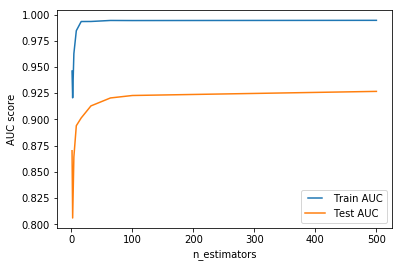

In [273]:
# plot hyper parameter test random Forest
'''
N_estimators
n_estimators represents the number of trees in the forest.
Usually the higher the number of trees the better to learn the data.
However, adding a lot of trees can slow down the training process considerably,
therefore we do a parameter search to find the sweet spot.
'''
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 500]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, label= "Train AUC")
line2, = plt.plot(n_estimators, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()


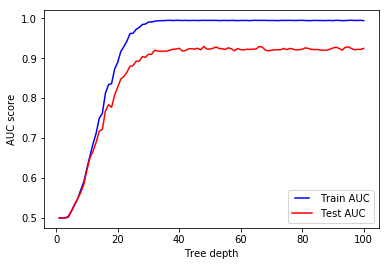

In [276]:
#max_depth
'''
max_depth represents the depth of each tree in the forest. The deeper the tree,
the more splits it has and it captures more information about the data. 
We fit each decision tree with depths ranging from 1 to 32 and plot 
the training and test errors.
'''
max_depths = np.linspace(1, 100, 100, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators= 100,max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()
